# Categorical variables. Visualization techniques

### Background	
There is an ice cream shop, that is operating in New York, LA and San Francisco.	
### Data	
You have sold 12,327 ice creams in New York; 17,129 in LA and 19,923 in San Francisco.	
### Task	
Order the data in a frequency distribution table.	
Create a new column in your table, representing the relative frequency of input. You can choose to express it in percentages or as a decimal.		

In [10]:
# import pandas module
import pandas as pd

# create a frequency distribution table as a pandas dataframe
fdt = pd.DataFrame({'Frequency' : [12327, 17129, 19923]}, index = ['New York', 'LA', 'San Francisco'])

# add relative frequency to the table
fdt['Relative frequency'] = fdt['Frequency']/fdt['Frequency'].sum()
fdt

,Frequency,Relative frequency
New York,12327,0.249641
LA,17129,0.346888
San Francisco,19923,0.403471


### Background	
You have a frequency distribution table with all the sales.	
### Task	
Create a bar chart, representing the data. 

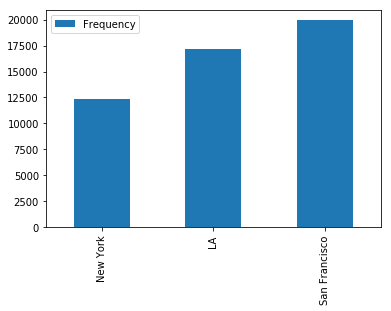

In [11]:
fdt.plot.bar(y='Frequency')

### Task	
Create a pie chart, representing the share of each city to the sales of your company.		

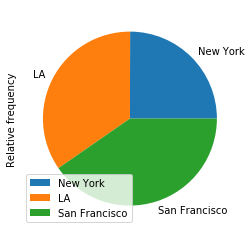

In [12]:
fdt.plot.pie(y='Relative frequency')

### Background	
You have a frequency distribution table with all the sales. You also have the relative frequency from the pie chart problem.
### Task 1	
Order the table by frequency.

In [15]:
fdt = fdt.sort_values(by='Frequency', ascending=False)

### Task 2
Create a bar (column) chart representing the ordered data.

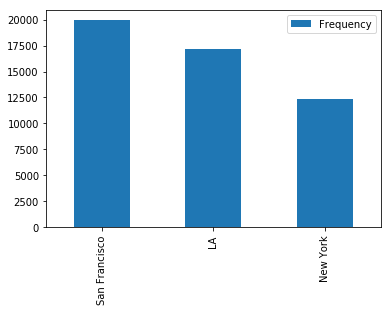

In [16]:
fdt.plot.bar(y='Frequency')

### Task 3	
In a new column, calculate the cumulative frequency of the data. 	

In [28]:
fdt['Cumulative frequency'] = fdt.Frequency.cumsum()/fdt.Frequency.sum()
fdt

,Frequency,Relative frequency,Relative cumulative frequency,Cumulative frequency
San Francisco,19923,0.403471,0.403471,0.403471
LA,17129,0.346888,0.750359,0.750359
New York,12327,0.249641,1.000000,1.000000


### Task 4	
On a second axis in the same chart, represent the cumulative frequency of the data.

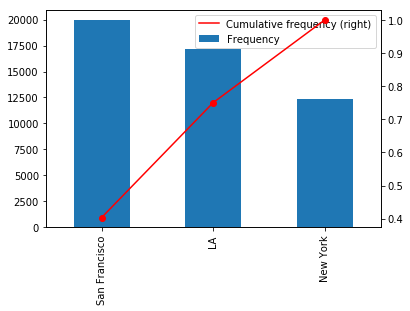

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fdt.plot(ax=ax, y='Cumulative frequency', style='ro-', secondary_y=True)
fdt.plot.bar(ax=ax, y='Frequency')